In [1]:
import warnings
import quandl
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.api as m
import matplotlib
import seaborn as sns
import datetime as dt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
df=quandl.get("NSE/IBULISL")

In [3]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-06-08,561.00,561.00,531.00,542.00,539.20,22729.0,122.36
2018-06-11,515.00,548.00,512.25,525.00,524.85,60741.0,317.60
2018-06-12,498.70,534.00,498.70,525.00,525.05,38802.0,204.62
2018-06-13,515.00,545.00,515.00,540.00,540.50,34213.0,184.40
2018-06-14,545.00,564.95,541.50,545.00,549.25,49978.0,276.60
2018-06-15,555.00,555.00,525.05,530.00,528.60,13751.0,73.71
2018-06-18,511.10,533.00,502.20,504.90,503.45,29635.0,149.72
2018-06-19,504.00,504.00,478.30,478.30,478.95,59210.0,285.74
2018-06-20,478.30,502.85,465.00,502.85,502.85,70793.0,345.24


In [4]:
df.columns


Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

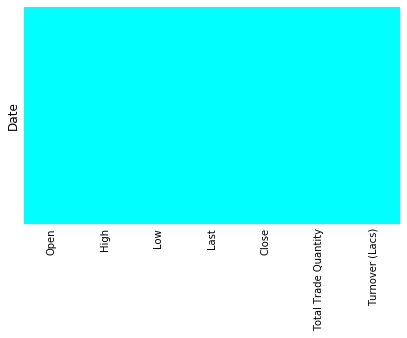

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')

In [6]:
df=df[['Open','Low','Close','High','Total Trade Quantity']]
df['HL_PCT']=(df['High']-df['Low'])/df['Close']*100.0
df['PCT_change']=(df['Close']-df['Open']/df['Open'])*100.0
df=df[['Close','HL_PCT','PCT_change','Total Trade Quantity']]
print(df.head())

             Close    HL_PCT  PCT_change  Total Trade Quantity
Date                                                          
2018-06-08  539.20  5.563798     53820.0               22729.0
2018-06-11  524.85  6.811470     52385.0               60741.0
2018-06-12  525.05  6.723169     52405.0               38802.0
2018-06-13  540.50  5.550416     53950.0               34213.0
2018-06-14  549.25  4.269458     54825.0               49978.0


In [7]:
from sklearn import preprocessing,cross_validation
x=df.drop(['Close'],1)
x=preprocessing.scale(x)
x
df.dropna(inplace=True)
y=df['Close']
y

ImportError: cannot import name 'cross_validation'

In [ ]:
plt.figure(figsize=(11,5))
plt.plot(y,c='magenta')
plt.title("Time series plotting")
plt.xlabel("Date")
plt.ylabel("India Bulls")
plt.show()

In [ ]:
#Arima=(p,q,d)seasonality,trend,noise
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

seasonal_pdq
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))



In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

In [ ]:
mod=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationaryity=False,enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
#validating forecasts
pred=results.get_prediction(start=pd.to_datetime('2018-12-05'),dynamic=False)
pred_ci=pred.conf_int()
ax=y['2018':].plot(label='observed',c='magenta')
pred.predicted_mean.plot(ax=ax,label='One-step ahead forecast',c='k',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
plt.title("Time series Plotting")
plt.xlabel('Date')
plt.ylabel('India Bulls')
plt.legend()